In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../data/train.csv', index_col='id')

In [3]:
print(train.shape)
train.head()

(61878, 94)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
label_name ='target'
label_name

'target'

In [5]:
feature_name = train.columns.difference([label_name])
#pd.columns.difference() (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.difference.html)
feature_name

Index(['feat_1', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14',
       'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_2',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_3', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_4', 'feat_40', 'feat_41',
       'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47',
       'feat_48', 'feat_49', 'feat_5', 'feat_50', 'feat_51', 'feat_52',
       'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58',
       'feat_59', 'feat_6', 'feat_60', 'feat_61', 'feat_62', 'feat_63',
       'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69',
       'feat_7', 'feat_70', 'feat_71', 'feat_72', 'feat_73', 'feat_74',
       'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_8',
       'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84

In [6]:
X = train[feature_name]

print(X.shape)
X.head()

(61878, 93)


,feat_1,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_9,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,1,1,0,...,0,1,2,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,4,0,...,1,0,0,0,0,0,1,0,0,0


In [7]:
y = train[label_name]

print(y.shape)
y.head()

(61878,)


id
1    Class_1
2    Class_1
3    Class_1
4    Class_1
5    Class_1
Name: target, dtype: object

### Evaluate

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
y_predict = model.predict(X)

print(y_predict.shape)
y_predict

(61878,)


array(['Class_1', 'Class_1', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype=object)

In [11]:
accuracy = (y_predict == y).mean()

f"accuracy = {accuracy : .6f}"

'accuracy =  1.000000'

### Hold-out Validation

In [12]:
from sklearn.model_selection import train_test_split
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [13]:
X.shape, y.shape

((61878, 93), (61878,))

In [14]:
x_train.shape, y_train.shape

((43314, 93), (43314,))

In [15]:
x_test.shape, y_test.shape

((18564, 93), (18564,))

### Evaluate by Hold-Out Validation

In [16]:
model = DecisionTreeClassifier()

model

model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

train_accuracy = (y_train_predict == y_train).mean()
test_accuracy = (y_test_predict == y_test).mean()

print(f"Accuracy(train) = {train_accuracy: .6f}")
print(f"Accuracy(test) = {test_accuracy: .6f}")

Accuracy(train) =  1.000000
Accuracy(test) =  0.712185


### Hyperparameter

In [17]:
model = DecisionTreeClassifier(max_depth = 25, random_state = 42)
#max_depth를 hyperparameter로 설정함
model

model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

train_accuracy = (y_train_predict == y_train).mean()
test_accuracy = (y_test_predict == y_test).mean()

print(f"Accuracy(train) = {train_accuracy: .6f}")
print(f"Accuracy(test) = {test_accuracy: .6f}")

Accuracy(train) =  0.889643
Accuracy(test) =  0.723551


![Overfitting](https://elitedatascience.com/wp-content/uploads/2017/09/early-stopping-graphic.jpg)

In [18]:
max_depth_list = range(2,100)
accuracy = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    model.fit(x_train, y_train)

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    train_accuracy = (y_train_predict == y_train).mean()
    test_accuracy = (y_test_predict == y_test).mean()

    accuracy.append({
        'max_depth': max_depth,
        'Accuracy(train)': train_accuracy,
        'Accuracy(test)': test_accuracy
    })
    
accuracy = pd.DataFrame(accuracy)

In [19]:
accuracy.head(35)

,Accuracy(test),Accuracy(train),max_depth
0,0.438160,0.439950,2
1,0.477537,0.477375,3
2,0.524402,0.527982,4
3,0.525479,0.529090,5
4,0.555591,0.558849,6
5,0.570297,0.568638,7
6,0.599224,0.605301,8
7,0.628528,0.634345,9
8,0.652984,0.660895,10
9,0.662034,0.676964,11


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

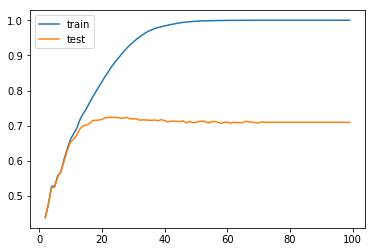

In [21]:
plt.plot(accuracy['max_depth'], accuracy['Accuracy(train)'], label='train')
plt.plot(accuracy['max_depth'], accuracy['Accuracy(test)'], label='test')

plt.legend()

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

model = RandomForestClassifier(random_state = 42)

model

model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

train_accuracy = (y_train_predict == y_train).mean()
test_accuracy = (y_test_predict == y_test).mean()

print(f"Accuracy(train) = {train_accuracy: .6f}")
print(f"Accuracy(test) = {test_accuracy: .6f}")

Accuracy(train) =  0.993028
Accuracy(test) =  0.779412


In [23]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
max_depth_list = range(100,2)
accuracy = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth, random_state = 42)
    model.fit(x_train, y_train)

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    train_accuracy = (y_train_predict == y_train).mean()
    test_accuracy = (y_test_predict == y_test).mean()

    accuracy.append({
        'max_depth': max_depth,
        'Accuracy(train)': train_accuracy,
        'Accuracy(test)': test_accuracy
    })
    
accuracy = pd.DataFrame(accuracy)

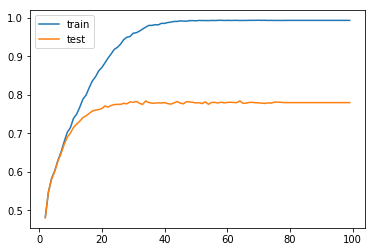

In [25]:
plt.plot(accuracy['max_depth'], accuracy['Accuracy(train)'], label='train')
plt.plot(accuracy['max_depth'], accuracy['Accuracy(test)'], label='test')

plt.legend()

In [26]:
accuracy.head(40)

,Accuracy(test),Accuracy(train),max_depth
0,0.479961,0.481807,2
1,0.548804,0.546636,3
2,0.580155,0.582583,4
3,0.600625,0.601953,5
4,0.626481,0.628873,6
5,0.647059,0.650667,7
6,0.670276,0.677448,8
7,0.689668,0.702013,9
8,0.700334,0.714480,10
9,0.714932,0.738745,11


### Minimize_Samples_Split

In [42]:
min_samples_split = range(100,1,-1)
accuracy = []

for min_samples in min_samples_split:
    model = RandomForestClassifier(max_depth = 40, random_state = 42, min_samples_split=min_samples )
    model.fit(x_train, y_train)

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    train_accuracy = (y_train_predict == y_train).mean()
    test_accuracy = (y_test_predict == y_test).mean()

    accuracy.append({
        'min_samples': min_samples,
        'Accuracy(train)': train_accuracy,
        'Accuracy(test)': test_accuracy
    })
    
accuracy = pd.DataFrame(accuracy)

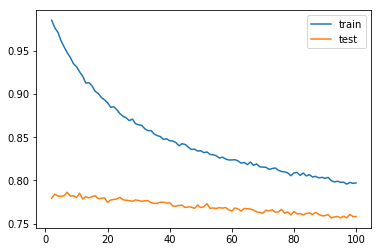

In [43]:
plt.plot(accuracy['min_samples'], accuracy['Accuracy(train)'], label='train')
plt.plot(accuracy['min_samples'], accuracy['Accuracy(test)'], label='test')

plt.legend()

### Minimize_Samples_Leaf

In [44]:
min_samples_leaf = range(2,100,1)
accuracy2 = []

for min_samples in min_samples_leaf:
    model = RandomForestClassifier(max_depth = 40, random_state = 42, min_samples_split=min_samples )
    model.fit(x_train, y_train)

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    train_accuracy = (y_train_predict == y_train).mean()
    test_accuracy = (y_test_predict == y_test).mean()

    accuracy2.append({
        'min_samples': min_samples,
        'Accuracy(train)': train_accuracy,
        'Accuracy(test)': test_accuracy
    })
    
accuracy2 = pd.DataFrame(accuracy2)

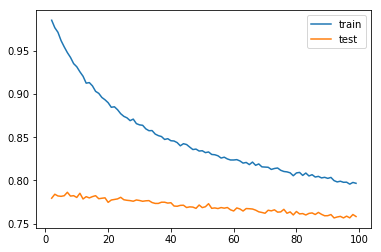

In [45]:
plt.plot(accuracy2['min_samples'], accuracy2['Accuracy(train)'], label='train')
plt.plot(accuracy2['min_samples'], accuracy2['Accuracy(test)'], label='test')

plt.legend()